In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
import plotly.graph_objects as go
import plotly.express as px

import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
import tensorflow as tf

from pylab import rcParams

In [3]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')  #Full file path to project folder: /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/

/content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry


In [4]:
ls

 AdminMap_hydrosites.xlsx
 All_Site_Summary_Data_09182020.xlsx
'Appendix F- Geochemistry and Conversions.csv'
'Appendix F- Geochemistry and Conversions.gsheet'
'Appendix F- Geochemistry.csv'
'Appendix F- Geochemistry.gsheet'
'Copy of All_Site_Summary_Data_09182020.xlsx'
'Copy of NPS_GCNP_spring_stream_chemistry_results_ScienceBase_07-20-2020.xlsx'
 GRCA-Spring-WaterChem.ipynb
 h_cluster_KP-Springs.png
 KP_springs.png
 NPS_GCNP_spring_stream_chemistry_results_ScienceBase_07-20-2020.xlsx


In [ ]:
# from google.colab import files  
# uploaded = files.upload()


### Springs used in this Analysis

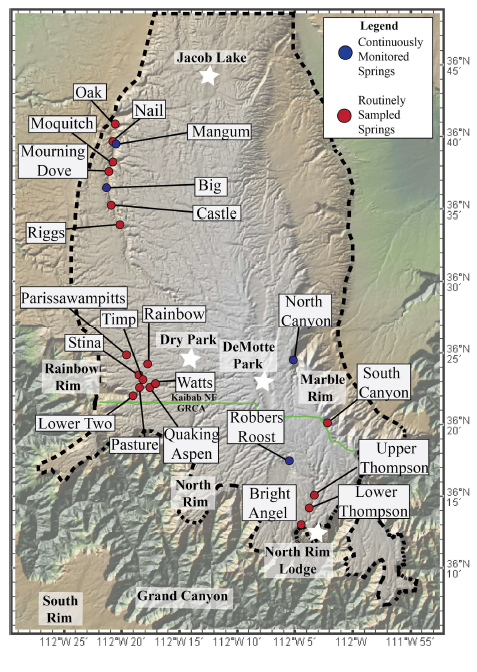

In [5]:
from IPython.display import Image
Image('KP_springs.png')

#Image originally from Wood, A.J., 2019, Hydrogeology of the Coconino Aquifer, Kaibab Plateau, Grand Canyon, AZ 

### Import chemistry data from Kaibab Plateau Springs

In [6]:
#dataset from Wood, A.J., 2019, Hydrogeology of the Coconino Aquifer, Kaibab Plateau, Grand Canyon, AZ 
KPchem = pd.read_csv('Appendix F- Geochemistry.csv' )  #if multiple headers include: header=[0,1]
KPchem.sample(10)

,Name,Easting,Northing,Date,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
118,Quaking Aspen,384952,4026666,11/10/2018,1370.110903,26334.77913,498.168714,65931.39479,7.681526256,29.918937,BDL,3.357287051,11.13436673,6.360956008,24.245252,92.266,242.0
108,Parisawampitts,381962,4030563,10/13/2018,2096.449776,22256.71875,2379.268737,51105.26742,5.133010818,37.939117,0,0,19.9952558,5.763041357,24.167446,73.362,200.0
5,Big,379354,4051598,6/25/2018,2195.856517,20868.48300,530.833000,40478.86600,3.064,61.057000,2.055,0,9.597,0,32.126000,61.347,230.0
53,Mangum,380011,4053934,12/18/2017,4500.285182,29891.61000,1945.140000,48419.99800,4.741,154.665000,0,0.413,17.81,0.58,137.905000,78.312,222.0
133,Riggs,380938,4046988,11/10/2018,2372.500075,20621.39888,477.392787,46905.44130,6.775678786,68.792382,BDL,BDL,13.56171439,3.400633141,87.601720,67.527,148.0
13,Big,379354,4051598,9/1/2018,2777.410708,23224.98551,2100.920843,43119.09280,4.074215936,54.114090,1.443309258,0,14.0420704,0,31.797498,66.344,211.5
125,Rainbow,384719,4028488,10/13/2018,1873.064465,36969.00861,2004.850503,64471.34149,6.649321019,31.609399,0,2.694146304,5.426181603,3.735821615,27.035811,101.440,316.0
10,Big,379354,4051598,7/14/2018,2240.389578,23272.90900,671.960000,43081.26100,3.067,73.975000,1.956,0,11.533,0,34.434000,66.354,224.0
169,Watts,385566,4026786,10/13/2018,1774.290443,28141.54667,1707.865912,70921.12324,5.11692112,28.801796,0,1.856507895,13.70106762,4.395806927,25.224976,99.063,304.0
151,Timp,383776,4027748,7/13/2018,1203.672618,34778.78100,201.189000,59476.74800,4.038,37.746000,0,0,0,0,30.469000,94.256,276.0


In [7]:
# #Function to filter out springs from dataset:
# def spring(spring_name):
#   spring_name = KPchem[KPchem['Name']==str(spring_name)]
#   return spring_name

# Big = spring('Big')

In [8]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(KPchem2.corr(), annot=True)

NameError: ignored

## Perform kmeans+ clustering on just two features first in order to visualize clusters. Then perform clustering on entire dataset 
Will be difficult to visualize with the high dimensionality once all the features are added.

In [9]:
# Plot features on each axis

fig = px.scatter(KPchem, x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'], color='Name')
fig.show()

#plt.scatter(x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'],cmap=KPchem['Name'])
# KPchem[['Name','Na23 (ug/L)', 'Mg24 (2+) (ug/L)']].plot(type='scatter')

In [10]:
#Create dataframe with just chemistry from springs and changing entries of "Beyond Detectable Limits (BDL)" to just 0.

KPchem2 = KPchem.iloc[:,4:].replace('BDL',0)
KPchem2.head(1)

,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
0,2539.155064,22339.372,1045.799,40251.3,2.569,59.588,0.476,0,12.887,0.463,31.26,62.591,208.847582


In [12]:
#Create dataframe with name of spring as index
KPchem['Name-Date'] = KPchem['Name'].astype(str) + ', ' + KPchem['Date'].astype(str)
KPchem3 = KPchem.drop(['Name','Date', 'Easting', 'Northing'], axis=1)  #df.pop returns the columns you want to remove.
KPchem3.set_index('Name-Date', inplace=True)
KPchem3 = KPchem3.replace('BDL',0)
KPchem3.head(2)

,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
Name-Date,,,,,,,,,,,,,
"Big, 11/12/2017",2539.155064,22339.372,1045.799,40251.300,2.569,59.588,0.476,0,12.887,0.463,31.260,62.591,208.847582
"Big, 12/18/2017",2461.661456,22247.263,881.265,45154.379,2.486,55.911,0.368,0,14.849,0,31.235,67.402,217.871999


## Perform unsupervised kmeans+ clustering on limited dataset


In [13]:
kmeans = KMeans(n_clusters=5)

In [14]:
kmeans.fit(KPchem2[['Na23 (ug/L)', 'K39 (ug/L)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.cluster_centers_

array([[4573.43621545, 2191.96317874],
       [1737.43560598,  518.10885643],
       [2032.96207557, 2171.76167714],
       [7398.35017833, 3348.62192567],
       [3643.31741063,  666.71645352]])

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 3, 3, 3, 3, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1], dtype=int32)

In [17]:
#Plot the clusters for the two features

fig = px.scatter(KPchem2, x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'], color= kmeans.labels_)
fig.show()

# fig, ax1 = plt.subplots(1,figsize=(10,6))
# ax1.set_title('K Means')
# ax1.scatter(KPchem2['Br- (umoles/L)'], KPchem2['F- (umoles/L)'], c=kmeans.labels_,cmap='rainbow')


In [15]:
KPchem2.shape

(171, 13)

## Clustering using kmeans+ on entire dataset

In [18]:
kmeans.labels_.shape

(171,)

In [19]:
# Run Lloyd's/kmeans+ algorithm

k = 7 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(KPchem3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [20]:
# Get a list of the springs in each cluster

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,171):
    clusters[kmeans.labels_[i]].append(KPchem3.index[i])

# Print out clusters
for j in range(0,k):
    print (j+1, clusters[j])

1 ['Lower Two, 6/26/2018', 'Lower Two, 8/5/2018', 'Lower Two, 11/10/2018', 'Parisawampitts, 5/25/2018', 'Quaking Aspen, 5/24/2018', 'Quaking Aspen, 6/26/2018', 'Quaking Aspen, 7/13/2018', 'Quaking Aspen, 8/5/2018', 'Quaking Aspen, 9/1/2018', 'Quaking Aspen, 10/13/2018', 'Quaking Aspen, 11/10/2018', 'Stina, 5/26/2018', 'Stina, 7/13/2018', 'Stina, 8/5/2018', 'Stina, 9/1/2018', 'Watts, 5/24/2018', 'Watts, 6/26/2018', 'Watts, 8/5/2018', 'Watts, 9/1/2018', 'Watts, 10/13/2018', 'Watts, 11/10/2018']
2 ['Big, 11/12/2017', 'Big, 12/18/2017', 'Big, 4/7/2018', 'Big, 4/7/2018', 'Big, 5/25/2018', 'Big, 6/25/2018', 'Big, 7/12/2018', 'Big, 7/12/2018', 'Big, 7/13/2018', 'Big, 7/14/2018', 'Big, 7/14/2018', 'Big, 8/4/2018', 'Big, 8/31/2018', 'Big, 9/1/2018', 'Big, 9/2/2018', 'Big, 10/7/2018', 'Big, 10/13/2018', 'Big, 10/14/2018', 'Big, 11/9/2018', 'Big, 11/12/2018', 'Big, 12/15/2018', 'Big, 12/16/2018', 'Castle, 11/12/2017', 'Castle, 12/18/2017', 'Castle, 4/8/2018', 'Castle, 4/8/2018', 'Castle, 5/25/201

## Clustering using mixture of Gaussians on entire dataset
kmeans+ has a tendency of producing spherical clusters.  Mixture of Gaussians solves this issue by basing cluster on distributions and variances.

In [21]:
k = 8
gmm = GaussianMixture(n_components=k)
gmm.fit(KPchem3)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
labels = gmm.predict(KPchem3)

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,171):
    clusters[labels[i]].append(KPchem3.index[i])

# Print out clusters
for j in range(0,k):
    print (j+1, clusters[j])

1 ['Bright Angel, 6/27/2018', 'Bright Angel, 7/12/2018', 'Mangum, 8/4/2018', 'Mangum, 9/1/2018', 'Mangum, 10/14/2018', 'Moquitch, 6/15/2018', 'Moquitch, 11/11/2018', 'Oak, 8/4/2018', 'Oak, 10/13/2018', 'Oak, 11/11/2018', 'Pasture, 11/10/2018', 'Timp, 7/13/2018', 'Timp, 8/5/2018', 'Timp, 9/1/2018', 'Timp, 10/13/2018', 'Timp, 11/10/2018', 'Warm, 12/17/2018']
2 ['Big, 11/12/2017', 'Big, 12/18/2017', 'Big, 4/7/2018', 'Big, 4/7/2018', 'Big, 5/25/2018', 'Big, 6/25/2018', 'Big, 7/12/2018', 'Big, 7/12/2018', 'Big, 7/13/2018', 'Big, 7/14/2018', 'Big, 7/14/2018', 'Big, 8/4/2018', 'Big, 8/31/2018', 'Big, 9/1/2018', 'Big, 9/2/2018', 'Big, 10/7/2018', 'Big, 10/13/2018', 'Big, 10/14/2018', 'Big, 11/9/2018', 'Big, 11/12/2018', 'Big, 12/15/2018', 'Big, 12/16/2018', 'Castle, 11/12/2017', 'Castle, 12/18/2017', 'Castle, 4/8/2018', 'Castle, 4/8/2018', 'Castle, 5/25/2018', 'Castle, 6/25/2018', 'Castle, 7/12/2018', 'Castle, 8/4/2018', 'Castle, 8/31/2018', 'Castle, 10/6/2018', 'Castle, 10/14/2018', 'Castle, 

In [21]:
# # Alternative way to visualize which springs fall into each cluster by putting it in a dataframe.

# #Create dataframe of springs in each cluster
# cluster_map = pd.DataFrame()
# cluster_map['Spring'] = KPchem3.index
# cluster_map['cluster'] = kmeans.labels_
# cluster_map.set_index('Spring', inplace=True)

# cluster_map.sample(5)

# #Filter each cluster by:
# #cluster_map[cluster_map.cluster == 0]

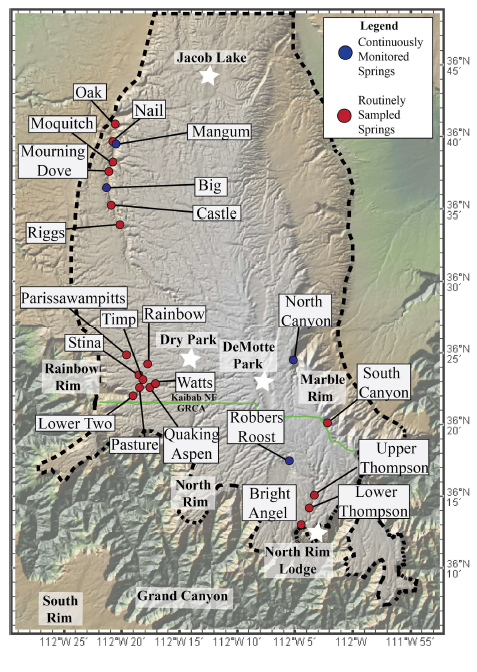

In [22]:
Image('KP_springs.png')

# Peform heirarchical clustering on dataset using Ward's average linkage algo and see how it compares to kmeans+ and mixture of Gaussians

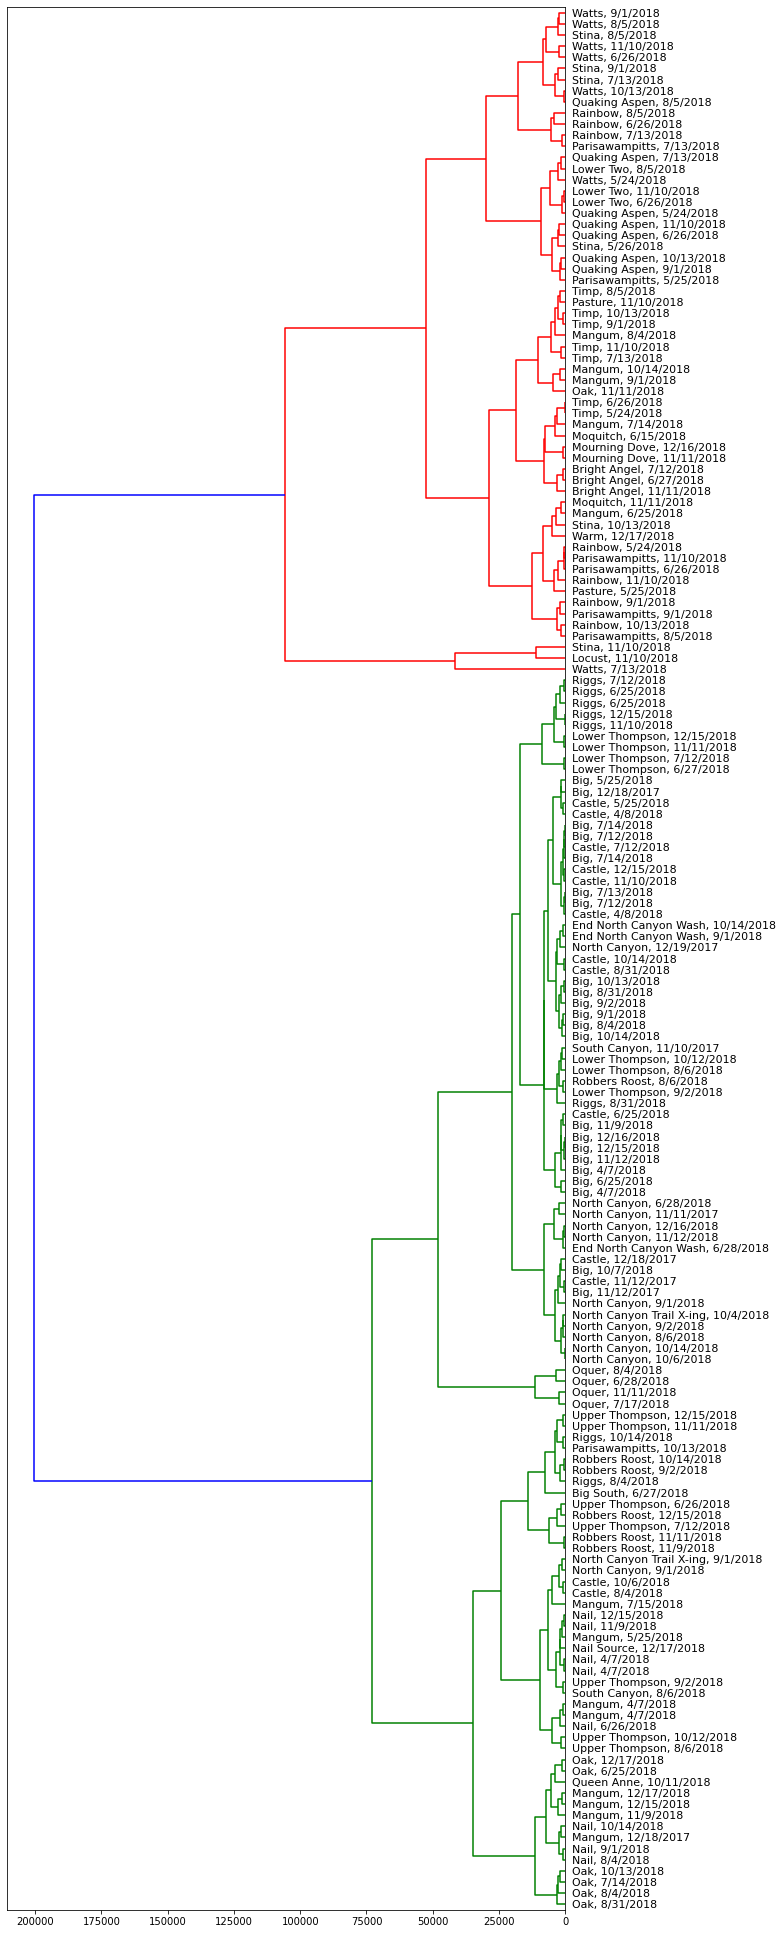

In [23]:
# Adjust figure size to accommodate the full tree
from pylab import rcParams
rcParams['figure.figsize'] = 10, 35

# Do hierarchical clustering using Ward's method
z = sch.linkage(KPchem3, method='ward')

# Display dendrogram
info = sch.dendrogram(z, orientation='left', labels=KPchem3.index, leaf_font_size=11)  #labels=KPchem['Names'],

## Principal Component Analysis

In [68]:
from sklearn.decomposition import PCA

In [124]:
#use standardscaler to scale data where mean is at the origin
scaler = StandardScaler()
scaler.fit(KPchem3)
scaled_data = scaler.transform(KPchem3)

Covariance Matrix:


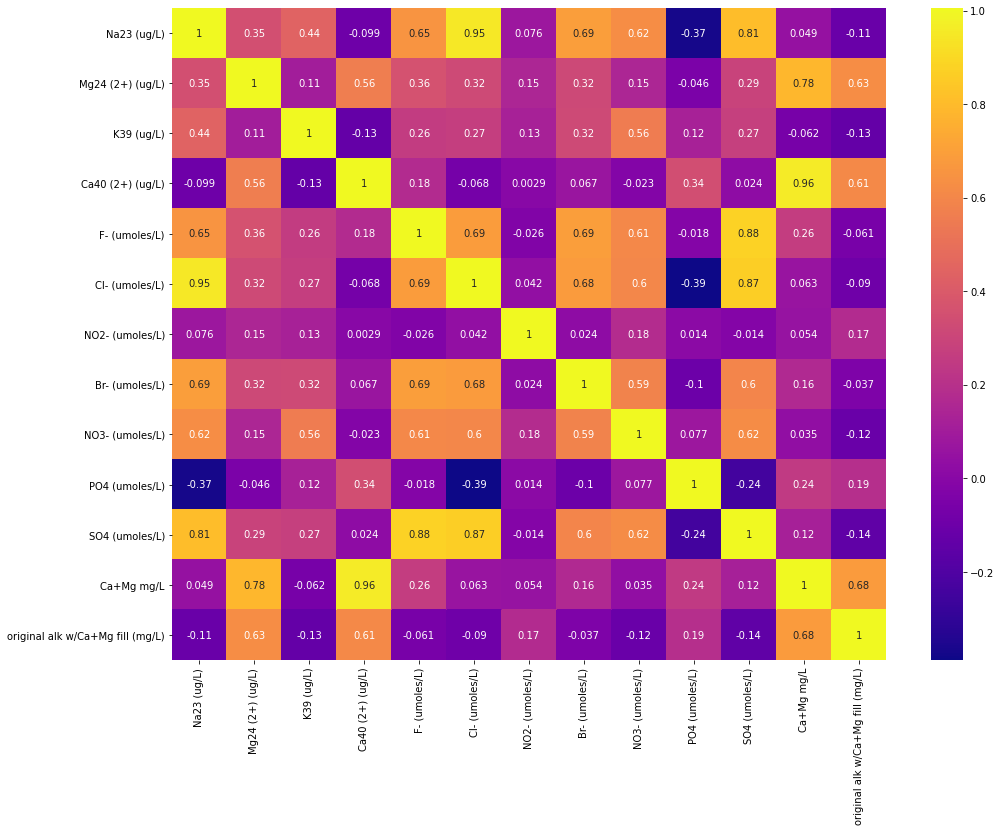

In [125]:
#get covariance matrix in order to determine eigenvectors and eigenvalues

mean_vec = np.mean(scaled_data, axis=0)
cov_mat = (scaled_data - mean_vec).T.dot((scaled_data-mean_vec) / (scaled_data.shape[0]-1))
print('Covariance Matrix:')
cov_mat_df = pd.DataFrame(cov_mat)
cov_mat_df.columns = KPchem3.columns
cov_mat_df.set_index(KPchem3.columns,inplace=True)

plt.figure(figsize=(16,12)) 
sns.heatmap(cov_mat_df,cmap='plasma', annot=True)
# cov_mat_df

In [126]:
#Perform eigendecomposition on covariance matrix

cov_mat = np.cov(scaled_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors')
pd.DataFrame(eig_vecs)

# print('Eigenvectors \n%s' %eig_vecs)
# print('Eigenvalues \n%s' %eig_vals)

Eigenvectors


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.410001,-0.106565,-0.109923,0.122117,-0.158630,0.529528,0.503348,-0.087137,-0.461121,-0.011812,0.089721,-0.078809,-2.856700e-06
1,-0.211354,0.401737,-0.152873,0.195439,-0.265501,-0.018096,-0.111120,-0.612286,0.163273,-0.014840,-0.415560,0.026294,-2.721196e-01
2,-0.203396,-0.097438,0.535586,0.127640,-0.646513,-0.127149,-0.072239,0.319118,-0.011166,-0.204315,-0.144127,0.205302,9.538482e-07
3,-0.048010,0.508438,0.013992,-0.189010,0.094276,-0.005574,0.037727,0.216593,-0.144379,-0.175212,0.383519,0.331813,-5.807571e-01
4,-0.384035,0.028585,0.015578,-0.268472,0.310056,-0.219796,0.519424,0.226798,0.337689,-0.109288,-0.431734,0.036389,-4.169932e-06
5,-0.407378,-0.096146,-0.204037,0.061353,0.019185,-0.709372,-0.122339,-0.051495,-0.424824,-0.019691,0.165004,-0.223872,7.961907e-07
6,-0.040981,0.060559,0.259910,0.784164,0.505615,-0.007203,-0.010370,0.067112,-0.085247,-0.051710,-0.086157,0.185776,-4.049539e-07
7,-0.360623,-0.011907,0.036898,-0.091320,0.040590,0.083095,-0.231978,0.114122,0.016303,0.824350,-0.022879,0.323072,1.349992e-06
8,-0.338947,-0.077326,0.385619,0.009562,0.069776,0.026494,0.033957,-0.333433,0.485397,-0.025833,0.574844,-0.213817,4.524655e-07
9,0.092582,0.204244,0.632377,-0.342152,0.223223,0.025763,-0.044769,-0.221429,-0.423740,0.098259,-0.237223,-0.292800,-8.588405e-07


In [127]:
print('Eigenvalues')  #maximum variance at highest eigenvalue
eig_vals_df = pd.DataFrame(eig_vals)
# eig_vals_df.set_index(KPchem3.columns, inplace=True)
eig_vals_df.T

Eigenvalues


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.973229,3.212444,1.376778,1.128311,0.70221,0.025692,0.051853,0.207113,0.260483,0.442788,0.317856,0.377712,1.654964e-10


In [146]:
#Run PCA

pca = PCA(n_components=5).fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [147]:
#Reduced 13 features
print(scaled_data.shape)
print(x_pca.shape)

(171, 13)
(171, 5)


In [148]:
#Variance explained by each principal component
print(pca.explained_variance_ratio_)

[0.38031892 0.24566601 0.10528669 0.08628557 0.0537003 ]


Text(0, 0.5, 'Cumulative Explained Variance')

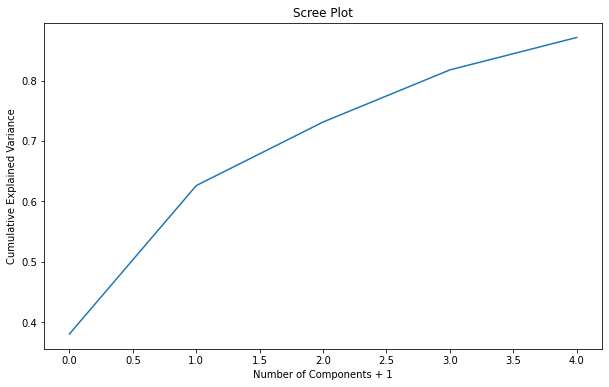

In [149]:
#Scree plot: variance explained within each Principal Component. 
#Roughly 83% of the variance in the data is captured by 4 components. 
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Number of Components + 1')  #need to shift x axis at some point by 1
plt.ylabel('Cumulative Explained Variance')

In [151]:
pca.explained_variance_

array([4.97322912, 3.21244438, 1.37677825, 1.12831077, 0.70221044])

In [153]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[ 0.9143316 , -0.19099974, -0.12897889,  0.12971489, -0.13292838],
       [ 0.47133524,  0.72004544, -0.17937576,  0.20759885, -0.22248474],
       [ 0.45358854, -0.17464131,  0.62843579,  0.13558226, -0.54176474],
       [ 0.10706604,  0.91128882,  0.01641743, -0.20077049,  0.07900144],
       [ 0.85642712,  0.05123385,  0.01827839, -0.28517602,  0.25982057],
       [ 0.90848405, -0.17232519, -0.2394098 ,  0.06517002,  0.0160763 ],
       [ 0.09138978,  0.10854198,  0.30496884,  0.83295466,  0.42369497],
       [ 0.80421573, -0.02134145,  0.04329472, -0.09700187,  0.03401395],
       [ 0.75587587, -0.13859307,  0.45247037,  0.01015704,  0.05847126],
       [-0.20646555,  0.36607312,  0.74200677, -0.36344085,  0.1870565 ],
       [ 0.89903627, -0.12189184, -0.13556272, -0.14512056,  0.17621237],
       [ 0.24820711,  0.94516106, -0.05119101, -0.07834203, -0.01910856],
       [-0.00944411,  0.83101675, -0.0627146 ,  0.24801414, -0.1304847 ]])

### Create interactive plot of first two principal components with loadings

In [159]:
#loadings = eigenvectors * sqrt(eigenvalues)
#https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
bla = pca.components_.T * pca.explained_variance_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = ['Na23', 'Mg24 (2+)', 'K39', 'Ca40 (2+)','F-', 'Cl-', 'NO2-', 'Br-','NO3-', 'PO4', 'SO4', 'Ca+Mg','orig. alk']

plt.figure(figsize=(20,20))
fig = px.scatter(scaled_data, x=x_pca[:,0], y=x_pca[:,1], color=KPchem2['Na23 (ug/L)'],size=KPchem3['Ca40 (2+) (ug/L)'], size_max=10, labels={'x':'PC1', 'y':'PC2','color':'Na23','size':'Ca40','hover_data_0':'Site Name-Date'},hover_data=[KPchem3.index])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.update_layout(
    autosize=False,
    width=1500,
    height=1000,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ))
fig.show()

<Figure size 1440x1440 with 0 Axes>

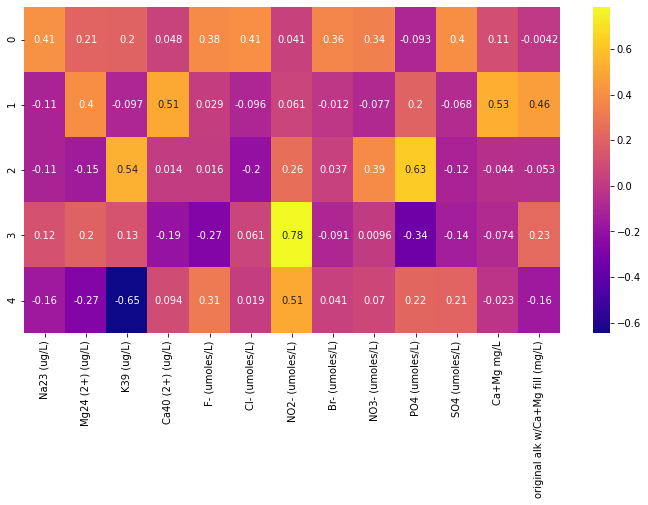

In [161]:
#Correlation between each original feature and the principal components themselves
#e.g. PO4 is specifically an important feature in PC2
df_comp = pd.DataFrame(pca.components_, columns=KPchem3.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma', annot=True)

From above heatmap: 

F -, Cl -, Br -, NO3 - account for much of the variance captured by PC1 (roughly 38% of the total variance).

Mg 2+, Ca 2+, Ca account for much of the variance captured by PC2 (roughly 25% of the total variance).

K (stable/no charge), NO 3-, PO4 3- account for much of the variance captured by PC3 (roughly 11% of the total variance).

NO 2- accounts for much of the variance captured by PC4 (roughly 9% of the total variance).

In [81]:
# #Even simpler than sklearn, can use yellowbricks to run PCA.  Added benefit is that it auto scales the data when scale=True

# from yellowbrick.features import PCADecomposition
# visualizer = PCADecomposition(scale=True, proj_dim=3, classes=['PC1', 'PC2', 'PC3'], colormap='RdBu')
# visualizer.fit_transform(KPchem2)